In [108]:
from PIL import Image
import torch
import os
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import *
import cv2

In [85]:
hh_csv = pd.read_csv("Origin_Data/hh.csv")
ih_csv = pd.read_csv("Origin_Data/ih.csv")
jw_csv = pd.read_csv("Origin_Data/jw.csv")
mh_csv = pd.read_csv("Origin_Data/mh.csv")

In [86]:
hh_csv

,image,xmin,ymin,xmax,ymax,label
0,00000.jpg,0.000000,41.558442,597.922078,571.428571,squid_peanut
1,00000.jpg,558.441558,137.142857,740.259740,344.935065,cidar
2,00000.jpg,715.324675,69.610390,906.493506,395.844156,diget_ori
3,00000.jpg,902.337662,21.818182,1082.077922,362.597403,welchs
4,00000.jpg,270.649351,431.168831,505.454545,646.233766,diget_choco
...,...,...,...,...,...,...
4678,00502.jpg,751.168831,446.753247,923.636364,578.701299,vita500
4679,00502.jpg,422.857143,311.688312,672.207792,649.350649,diget_choco
4680,00502.jpg,50.909091,336.623377,481.038961,538.181818,chocopie
4681,00502.jpg,628.571429,564.155844,1198.961039,738.701299,samdasu


In [87]:
ih_csv

,image,xmin,ymin,xmax,ymax,label
0,00503.jpg,30.054475,55.767635,227.284047,390.373444,diget_choco
1,00503.jpg,260.155642,63.734440,449.416342,391.369295,diget_ori
2,00503.jpg,474.319066,82.655602,691.470817,447.136929,chocopie
3,00503.jpg,655.610895,52.780083,951.455253,449.128631,couque_white
4,00503.jpg,939.501946,285.809129,1125.774319,626.390041,welchs
...,...,...,...,...,...,...
4327,01002.jpg,747.221644,408.285582,1173.444329,673.128466,jjolbyung_ori
4328,01002.jpg,841.789802,249.912200,1224.058273,413.609057,coke
4329,01002.jpg,824.474506,0.000000,1249.365245,249.912200,jjolbyung_noodle
4330,01002.jpg,494.151925,5.032348,836.462019,204.662662,welchs


In [88]:
jw_csv

,image,xmin,ymin,xmax,ymax,label
0,01003.jpg,25.248244,93.049654,315.744681,379.007127,diget_choco
1,01003.jpg,308.936170,24.964548,516.595745,361.985850,diget_ori
2,01003.jpg,512.056807,11.347526,786.666701,392.624148,couque_white
3,01003.jpg,734.468085,13.617021,1062.127660,544.680851,toreta
4,01003.jpg,806.524892,271.205613,1174.468085,949.787234,zec
...,...,...,...,...,...,...
4255,01502.jpg,810.496489,240.567393,982.978723,813.617021,samdasu
4256,01502.jpg,1004.539042,195.177314,1216.737658,863.546169,zec
4257,01502.jpg,641.418509,275.744681,825.248296,859.007127,toreta
4258,01502.jpg,253.333351,228.085106,683.404255,830.638298,squid_peanut


In [89]:
mh_csv

,image,xmin,ymin,xmax,ymax,label
0,01503.jpg,4.155642,5.975104,500.217899,670.207469,squid_peanut
1,01503.jpg,454.396887,83.153527,855.657588,351.535270,cidar
2,01503.jpg,332.700389,328.630705,573.929961,699.087137,coke
3,01503.jpg,651.455253,234.024896,957.517510,594.522822,diget_choco
4,01503.jpg,736.124514,231.037344,1242.147860,868.381743,homerunball
...,...,...,...,...,...,...
4476,02002.jpg,796.560311,99.585062,1181.058366,228.049793,vita500
4477,02002.jpg,453.898833,264.896266,780.622568,468.049793,diget_ori
4478,02002.jpg,772.653696,231.037344,1047.579767,657.261411,jjolbyung_noodle
4479,02002.jpg,1039.610895,213.112033,1239.828794,879.336100,zec


In [90]:
data_csv = hh_csv.merge(ih_csv, how='outer').merge(jw_csv, how='outer').merge(mh_csv, how='outer')

In [91]:
from numpy.random import RandomState

rng = RandomState()

train = data_csv.sample(frac=0.7, random_state=rng)
test = data_csv.loc[~data_csv.index.isin(train.index)]

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [92]:
train.to_csv("./Crop_Data/train.csv", index=False)
test.to_csv("./Crop_Data/test.csv", index=False)

In [93]:
label_classes = sorted(train['label'].unique(), key=lambda x: x[0])
print(label_classes)

['ID_gum', 'buttering', 'couque_white', 'cidar', 'chocopie', 'coke', 'couque_coffee', 'diget_ori', 'diget_choco', 'gumi_gumi', 'homerunball', 'juicyfresh', 'jjolbyung_ori', 'jjolbyung_noodle', 'samdasu', 'spearmint', 'squid_peanut', 'toreta', 'tuna', 'vita500', 'welchs', 'zec']


In [94]:
def make_folder(directory):
    if not os.path.isdir(directory):
        os.mkdir(directory)
        
path_train = os.path.join(os.getcwd(), 'Crop_Data/train')
path_val = os.path.join(os.getcwd(), 'Crop_Data/val')
path_test = os.path.join(os.getcwd(), 'Crop_Data/test')

make_folder(path_train)
make_folder(path_val)
make_folder(path_test)

In [95]:
for tag in label_classes:
    path_train_label = os.path.join(path_train, tag)
    path_val_label = os.path.join(path_val, tag)
    make_folder(path_train_label)
    make_folder(path_val_label)

In [98]:
train

,image,xmin,ymin,xmax,ymax,label
0,01421.jpg,222.695053,173.617021,788.936170,359.716329,toreta
1,00651.jpg,621.818182,533.333333,829.090909,620.606061,juicyfresh
2,01865.jpg,829.431907,64.730290,1271.704280,245.975104,couque_white
3,01538.jpg,550.023346,389.377593,752.233463,782.738589,cidar
4,01864.jpg,436.964981,381.410788,670.054475,607.468880,tuna
...,...,...,...,...,...,...
12424,01998.jpg,617.260700,659.253112,956.933852,846.473029,welchs
12425,00392.jpg,734.545455,36.363636,1280.000000,447.792208,squid_peanut
12426,00414.jpg,1051.428571,104.935065,1273.766234,445.714286,diget_ori
12427,00810.jpg,347.195467,0.113350,773.257790,264.899244,jjolbyung_ori


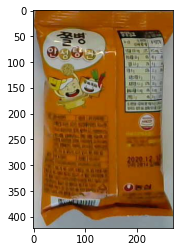

In [116]:
data_path = os.path.join(os.getcwd(), 'Origin_Data\\image\\')

for i in range(len(train)):
    name = train.loc[i, 'image']
    xmin = train.loc[i, 'xmin']
    ymin = train.loc[i, 'ymin']
    xmax = train.loc[i, 'xmax']
    ymax = train.loc[i, 'ymax']
    label = train.loc[i, 'label']
    
    area = (xmin, ymin, xmax, ymax)
    
    path_train_label = os.path.join(path_train, label)
    path_val_label = os.path.join(path_val, label)
    
    if label == 'ID_gum':
        tag = '{0}_{1}.jpg'.format(i, label)
        path_train_image = os.path.join(path_train_label, tag)
        path_val_image = os.path.join(path_val_label, tag)
        
        rand_num = randint(0, 4)
        img = Image.open(os.path.join(data_path, name))
        cropped_img = img.crop(area)
        
        plt.imshow(cropped_img)
        
        if rand_num == 0:
            cropped_img.save(path_val_image)
        else:
            cropped_img.save(path_train_image)

    elif label == 'buttering':
        tag = '{0}_{1}.jpg'.format(i, label)
        path_train_image = os.path.join(path_train_label, tag)
        path_val_image = os.path.join(path_val_label, tag)
        
        rand_num = randint(0, 4)
        img = Image.open(os.path.join(data_path, name))
        cropped_img = img.crop(area)
        
        plt.imshow(cropped_img)
        
        if rand_num == 0:
            cropped_img.save(path_val_image)
        else:
            cropped_img.save(path_train_image)
            
    elif label == 'couque_white':
        tag = '{0}_{1}.jpg'.format(i, label)
        path_train_image = os.path.join(path_train_label, tag)
        path_val_image = os.path.join(path_val_label, tag)
        
        rand_num = randint(0, 4)
        img = Image.open(os.path.join(data_path, name))
        cropped_img = img.crop(area)
        
        plt.imshow(cropped_img)
        
        if rand_num == 0:
            cropped_img.save(path_val_image)
        else:
            cropped_img.save(path_train_image)
            
    elif label == 'cidar':
        tag = '{0}_{1}.jpg'.format(i, label)
        path_train_image = os.path.join(path_train_label, tag)
        path_val_image = os.path.join(path_val_label, tag)
        
        rand_num = randint(0, 4)
        img = Image.open(os.path.join(data_path, name))
        cropped_img = img.crop(area)
        
        plt.imshow(cropped_img)
        
        if rand_num == 0:
            cropped_img.save(path_val_image)
        else:
            cropped_img.save(path_train_image)
            
    elif label == 'chocopie':
        tag = '{0}_{1}.jpg'.format(i, label)
        path_train_image = os.path.join(path_train_label, tag)
        path_val_image = os.path.join(path_val_label, tag)
        
        rand_num = randint(0, 4)
        img = Image.open(os.path.join(data_path, name))
        cropped_img = img.crop(area)
        
        plt.imshow(cropped_img)
        
        if rand_num == 0:
            cropped_img.save(path_val_image)
        else:
            cropped_img.save(path_train_image)
            
    elif label == 'coke':
        tag = '{0}_{1}.jpg'.format(i, label)
        path_train_image = os.path.join(path_train_label, tag)
        path_val_image = os.path.join(path_val_label, tag)
        
        rand_num = randint(0, 4)
        img = Image.open(os.path.join(data_path, name))
        cropped_img = img.crop(area)
        
        plt.imshow(cropped_img)
        
        if rand_num == 0:
            cropped_img.save(path_val_image)
        else:
            cropped_img.save(path_train_image)
            
    elif label == 'couque_coffee':
        tag = '{0}_{1}.jpg'.format(i, label)
        path_train_image = os.path.join(path_train_label, tag)
        path_val_image = os.path.join(path_val_label, tag)
        
        rand_num = randint(0, 4)
        img = Image.open(os.path.join(data_path, name))
        cropped_img = img.crop(area)
        
        plt.imshow(cropped_img)
        
        if rand_num == 0:
            cropped_img.save(path_val_image)
        else:
            cropped_img.save(path_train_image)
            
    elif label == 'diget_ori':
        tag = '{0}_{1}.jpg'.format(i, label)
        path_train_image = os.path.join(path_train_label, tag)
        path_val_image = os.path.join(path_val_label, tag)
        
        rand_num = randint(0, 4)
        img = Image.open(os.path.join(data_path, name))
        cropped_img = img.crop(area)
        
        plt.imshow(cropped_img)
        
        if rand_num == 0:
            cropped_img.save(path_val_image)
        else:
            cropped_img.save(path_train_image)
            
    elif label == 'diget_choco':
        tag = '{0}_{1}.jpg'.format(i, label)
        path_train_image = os.path.join(path_train_label, tag)
        path_val_image = os.path.join(path_val_label, tag)
        
        rand_num = randint(0, 4)
        img = Image.open(os.path.join(data_path, name))
        cropped_img = img.crop(area)
        
        plt.imshow(cropped_img)
        
        if rand_num == 0:
            cropped_img.save(path_val_image)
        else:
            cropped_img.save(path_train_image)
            
    elif label == 'gumi_gumi':
        tag = '{0}_{1}.jpg'.format(i, label)
        path_train_image = os.path.join(path_train_label, tag)
        path_val_image = os.path.join(path_val_label, tag)
        
        rand_num = randint(0, 4)
        img = Image.open(os.path.join(data_path, name))
        cropped_img = img.crop(area)
        
        plt.imshow(cropped_img)
        
        if rand_num == 0:
            cropped_img.save(path_val_image)
        else:
            cropped_img.save(path_train_image)
            
    elif label == 'homerunball':
        tag = '{0}_{1}.jpg'.format(i, label)
        path_train_image = os.path.join(path_train_label, tag)
        path_val_image = os.path.join(path_val_label, tag)
        
        rand_num = randint(0, 4)
        img = Image.open(os.path.join(data_path, name))
        cropped_img = img.crop(area)
        
        plt.imshow(cropped_img)
        
        if rand_num == 0:
            cropped_img.save(path_val_image)
        else:
            cropped_img.save(path_train_image)
            
    elif label == 'juicyfresh':
        tag = '{0}_{1}.jpg'.format(i, label)
        path_train_image = os.path.join(path_train_label, tag)
        path_val_image = os.path.join(path_val_label, tag)
        
        rand_num = randint(0, 4)
        img = Image.open(os.path.join(data_path, name))
        cropped_img = img.crop(area)
        
        plt.imshow(cropped_img)
        
        if rand_num == 0:
            cropped_img.save(path_val_image)
        else:
            cropped_img.save(path_train_image)
            
    elif label == 'jjolbyung_ori':
        tag = '{0}_{1}.jpg'.format(i, label)
        path_train_image = os.path.join(path_train_label, tag)
        path_val_image = os.path.join(path_val_label, tag)
        
        rand_num = randint(0, 4)
        img = Image.open(os.path.join(data_path, name))
        cropped_img = img.crop(area)
        
        plt.imshow(cropped_img)
        
        if rand_num == 0:
            cropped_img.save(path_val_image)
        else:
            cropped_img.save(path_train_image)
            
    elif label == 'jjolbyung_noodle':
        tag = '{0}_{1}.jpg'.format(i, label)
        path_train_image = os.path.join(path_train_label, tag)
        path_val_image = os.path.join(path_val_label, tag)
        
        rand_num = randint(0, 4)
        img = Image.open(os.path.join(data_path, name))
        cropped_img = img.crop(area)
        
        plt.imshow(cropped_img)
        
        if rand_num == 0:
            cropped_img.save(path_val_image)
        else:
            cropped_img.save(path_train_image)
            
    elif label == 'samdasu':
        tag = '{0}_{1}.jpg'.format(i, label)
        path_train_image = os.path.join(path_train_label, tag)
        path_val_image = os.path.join(path_val_label, tag)
        
        rand_num = randint(0, 4)
        img = Image.open(os.path.join(data_path, name))
        cropped_img = img.crop(area)
        
        plt.imshow(cropped_img)
        
        if rand_num == 0:
            cropped_img.save(path_val_image)
        else:
            cropped_img.save(path_train_image)
            
    elif label == 'spearmint':
        tag = '{0}_{1}.jpg'.format(i, label)
        path_train_image = os.path.join(path_train_label, tag)
        path_val_image = os.path.join(path_val_label, tag)
        
        rand_num = randint(0, 4)
        img = Image.open(os.path.join(data_path, name))
        cropped_img = img.crop(area)
        
        plt.imshow(cropped_img)
        
        if rand_num == 0:
            cropped_img.save(path_val_image)
        else:
            cropped_img.save(path_train_image)
            
    elif label == 'squid_peanut':
        tag = '{0}_{1}.jpg'.format(i, label)
        path_train_image = os.path.join(path_train_label, tag)
        path_val_image = os.path.join(path_val_label, tag)
        
        rand_num = randint(0, 4)
        img = Image.open(os.path.join(data_path, name))
        cropped_img = img.crop(area)
        
        plt.imshow(cropped_img)
        
        if rand_num == 0:
            cropped_img.save(path_val_image)
        else:
            cropped_img.save(path_train_image)
            
    elif label == 'toreta':
        tag = '{0}_{1}.jpg'.format(i, label)
        path_train_image = os.path.join(path_train_label, tag)
        path_val_image = os.path.join(path_val_label, tag)
        
        rand_num = randint(0, 4)
        img = Image.open(os.path.join(data_path, name))
        cropped_img = img.crop(area)
        
        plt.imshow(cropped_img)
        
        if rand_num == 0:
            cropped_img.save(path_val_image)
        else:
            cropped_img.save(path_train_image)
            
    elif label == 'tuna':
        tag = '{0}_{1}.jpg'.format(i, label)
        path_train_image = os.path.join(path_train_label, tag)
        path_val_image = os.path.join(path_val_label, tag)
        
        rand_num = randint(0, 4)
        img = Image.open(os.path.join(data_path, name))
        cropped_img = img.crop(area)
        
        plt.imshow(cropped_img)
        
        if rand_num == 0:
            cropped_img.save(path_val_image)
        else:
            cropped_img.save(path_train_image)
            
    elif label == 'vita500':
        tag = '{0}_{1}.jpg'.format(i, label)
        path_train_image = os.path.join(path_train_label, tag)
        path_val_image = os.path.join(path_val_label, tag)
        
        rand_num = randint(0, 4)
        img = Image.open(os.path.join(data_path, name))
        cropped_img = img.crop(area)
        
        plt.imshow(cropped_img)
        
        if rand_num == 0:
            cropped_img.save(path_val_image)
        else:
            cropped_img.save(path_train_image)
    
    elif label == 'welchs':
        tag = '{0}_{1}.jpg'.format(i, label)
        path_train_image = os.path.join(path_train_label, tag)
        path_val_image = os.path.join(path_val_label, tag)
        
        rand_num = randint(0, 4)
        img = Image.open(os.path.join(data_path, name))
        cropped_img = img.crop(area)
        
        plt.imshow(cropped_img)
        
        if rand_num == 0:
            cropped_img.save(path_val_image)
        else:
            cropped_img.save(path_train_image)
    
    elif label == 'zec':
        tag = '{0}_{1}.jpg'.format(i, label)
        path_train_image = os.path.join(path_train_label, tag)
        path_val_image = os.path.join(path_val_label, tag)
        
        rand_num = randint(0, 4)
        img = Image.open(os.path.join(data_path, name))
        cropped_img = img.crop(area)
        
        plt.imshow(cropped_img)
        
        if rand_num == 0:
            cropped_img.save(path_val_image)
        else:
            cropped_img.save(path_train_image)